In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sb
sb.set_style('whitegrid')
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [14]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("D:\\PROGRAMMING\\Datasets\\pima-indians-diabetes.csv", header=None, names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


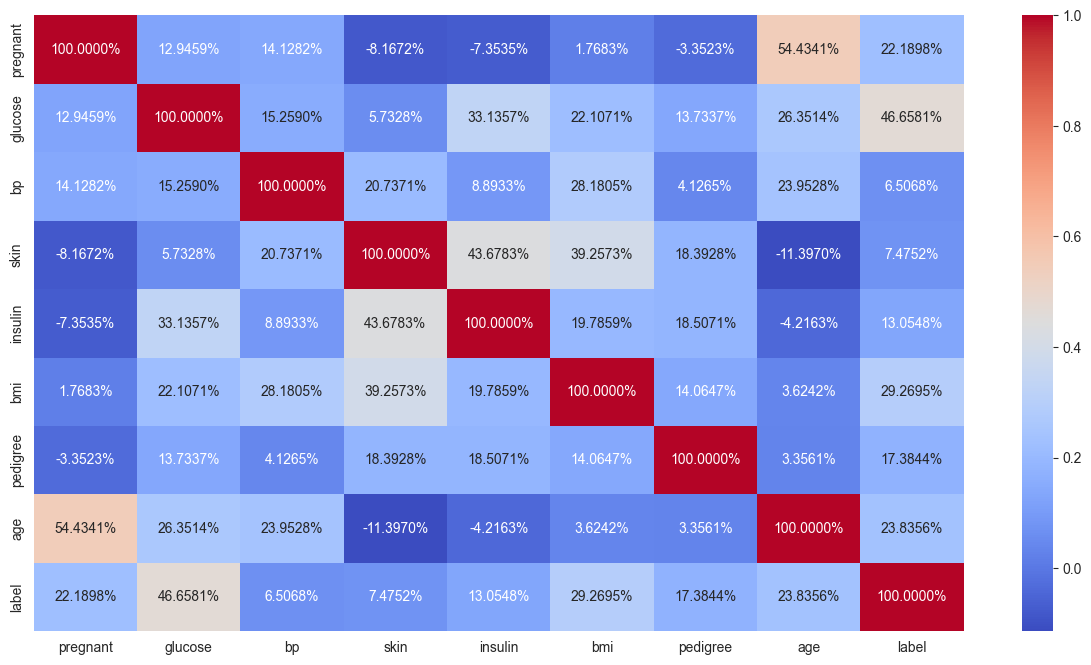

In [15]:
plt.figure(figsize=(15, 8))
sb.heatmap(data.corr(), annot=True, fmt=".4%", cmap='coolwarm')
plt.show()

In [16]:
## Independent / Dependent Variables
X = data[['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']]
y = data[['label']]

In [17]:
## Training and testing our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 7)
(192, 7)
(576, 1)
(192, 1)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
## training our model
logreg = LogisticRegression(random_state=25)
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

In [29]:
final = pd.DataFrame(np.c_[y_test,y_predict], columns = ["A","P"])
# final = pd.DataFrame({'A':y_test.values.flatten(), 'P':y_predict.flatten()})

In [28]:

px.scatter(final, 'A', 'P', trendline='ols', trendline_color_override='blue')

In [21]:
## Confusion matri
matrix = metrics.confusion_matrix(y_test, y_predict)
print(matrix)

[[112  18]
 [ 24  38]]


In [22]:
# True Negative (TN): 112
# False Positive (FP): 18
# False Negative (FN): 24
# True Positive (TP): 38

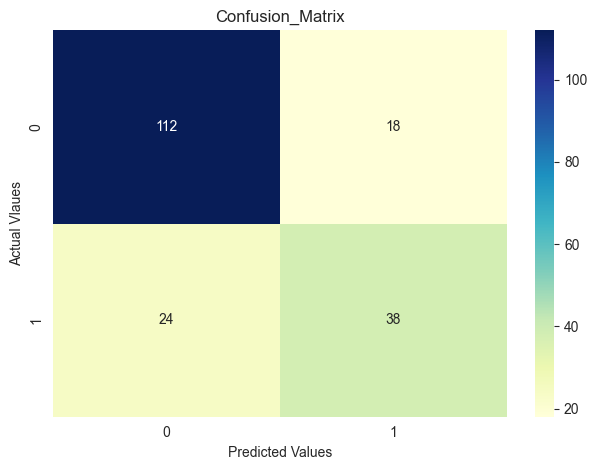

In [23]:
sb.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion_Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Vlaues')
plt.tight_layout()

In [24]:
target_names = ['Without diabetes', 'With diabetes']
print(metrics.classification_report(y_test, y_predict, target_names=target_names))

                  precision    recall  f1-score   support

Without diabetes       0.82      0.86      0.84       130
   With diabetes       0.68      0.61      0.64        62

        accuracy                           0.78       192
       macro avg       0.75      0.74      0.74       192
    weighted avg       0.78      0.78      0.78       192



In [25]:
test_acc = logreg.score(y_test, y_predict)
print("The Accuracy for Training Set is {}".format(test_acc*100))

ValueError: X has 1 features, but LogisticRegression is expecting 7 features as input.

In [ ]:
## Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against
## the false positive rate.
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
fig = px.line(df_roc, x='False Positive Rate', y='True Positive Rate', title='Receiver Operating Characteristic')
fig.update_layout(showlegend=False)
fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
fig.update_xaxes(title='False Positive Rate')
fig.update_yaxes(title='True Positive Rate')
fig.show()


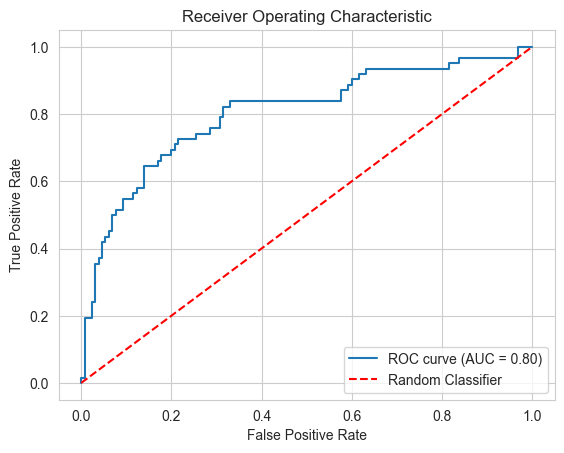

In [ ]:
## Roc (Receiver Operating Characteristics) for AUC(Area Under Curve)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) ##false positive rate / true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

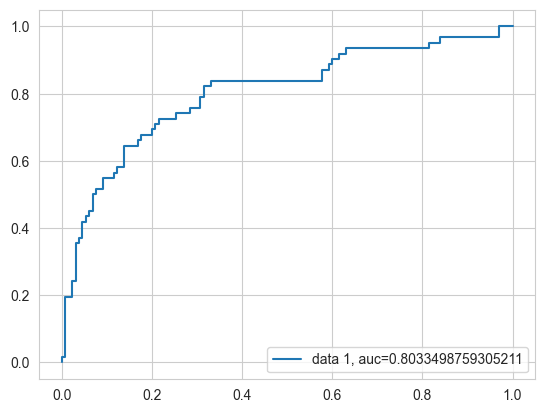

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [ ]:
# import numpy as np

# # Define the logistic regression class
# class LogisticRegression:
#     def __init__(self, learning_rate=0.1, num_iterations=1000):
#         self.learning_rate = learning_rate
#         self.num_iterations = num_iterations

#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))

#     def cost_function(self, X, y, theta):
#         m = len(y)
#         h = self.sigmoid(np.dot(X, theta))
#         cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
#         return cost

#     def fit(self, X, y):
#         m, n = X.shape
#         X = np.concatenate((np.ones((m, 1)), X), axis=1)
#         self.theta = np.zeros(n + 1)

#         for iteration in range(self.num_iterations):
#             z = np.dot(X, self.theta)
#             h = self.sigmoid(z)
#             gradient = np.dot(X.T, (h - y)) / m
#             self.theta -= self.learning_rate * gradient

#     def predict(self, X):
#         m = X.shape[0]
#         X = np.concatenate((np.ones((m, 1)), X), axis=1)
#         prob = self.sigmoid(np.dot(X, self.theta))
#         predictions = np.where(prob >= 0.5, 1, 0)
#         return predictions

# # Instantiate the logistic regression model
# model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Calculate the cost
# cost = model.cost_function(X_test, y_test, model.theta)

# # Print the results
# print("Predictions:", y_pred)
# print("Cost:", cost)
